In [204]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [205]:
df=pd.read_csv("data-ready-AD.csv")

In [206]:
df.head()

,Account_No,DATE,TRANSACTION_DETAILS,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,year,month,mean_BAL,max_WITH,mean_DEP,mean_months,number_of_transactions,cluster
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,0.0,1000000.0,1000000.0,2017,6,1.478073e+06,912000.0,133448.873742,7.356816,1093,3
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,0.0,1000000.0,2000000.0,2017,7,1.478073e+06,912000.0,133448.873742,7.356816,1093,3
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.0,500000.0,2500000.0,2017,7,1.478073e+06,912000.0,133448.873742,7.356816,1093,3
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,0.0,3000000.0,5500000.0,2017,8,1.478073e+06,912000.0,133448.873742,7.356816,1093,3
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,500000.0,6000000.0,2017,8,1.478073e+06,912000.0,133448.873742,7.356816,1093,3


In [207]:
#convert DATE to date format
date=pd.to_datetime(df.DATE)
df["DATE"]=date

In [208]:
df["cluster"].value_counts()

2    78598
0    18042
4    10569
3     8151
1      802
Name: cluster, dtype: int64

In [209]:
df.drop(['TRANSACTION_DETAILS', 'mean_BAL', 'max_WITH',
       'mean_DEP', 'mean_months', 'number_of_transactions'], axis=1, inplace=True)

In [210]:
data_per_cluster=[]
clusters=np.sort(list(df["cluster"].unique()))
for i in clusters:
    data_per_cluster.append(df[df["cluster"]==i])
    data_per_cluster[i].reset_index(drop=True, inplace=True)

In [211]:
len(data_per_cluster)

5

In [212]:
for i,subset in enumerate(data_per_cluster):
    print("==== clients of cluster {} are ======= ".format(i))
    print(subset["Account_No"].value_counts())

==== clients of cluster 0 are ======= 
409000438620'    13454
409000438611'     4588
Name: Account_No, dtype: int64
==== clients of cluster 1 are ======= 
409000425051'    802
Name: Account_No, dtype: int64
==== clients of cluster 2 are ======= 
1196428'         48758
409000362497'    29840
Name: Account_No, dtype: int64
==== clients of cluster 3 are ======= 
409000493210'    6014
409000611074'    1093
409000493201'    1044
Name: Account_No, dtype: int64
==== clients of cluster 4 are ======= 
1196711'         10518
409000405747'       51
Name: Account_No, dtype: int64


In [213]:
df0=data_per_cluster[0]

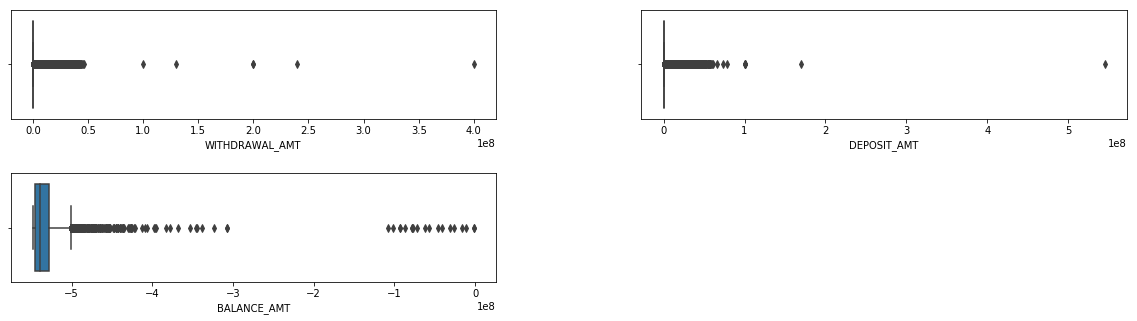

In [214]:
# detecting outliers
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ["WITHDRAWAL_AMT","DEPOSIT_AMT","BALANCE_AMT"]:
    n += 1
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    sns.boxplot(x=df0[x])
    #plt.ylabel( x )
plt.show()


In [215]:
Q1 = df0.quantile(0.25)
Q3 = df0.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

In [216]:
df0.shape

(18042, 8)

In [217]:
df0 = df0[~((df0[ ["WITHDRAWAL_AMT","DEPOSIT_AMT","BALANCE_AMT"]] < (Q1-1.5 * IQR)) |(df0[ ["WITHDRAWAL_AMT","DEPOSIT_AMT","BALANCE_AMT"]] > (Q3 + 1.5 * IQR))).any(axis=1)]
df0.shape

(10130, 8)

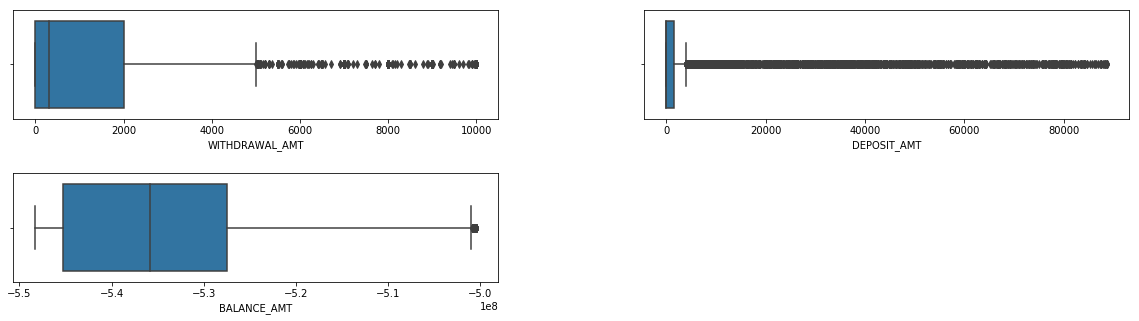

In [218]:
# detecting outliers
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ["WITHDRAWAL_AMT","DEPOSIT_AMT","BALANCE_AMT"]:
    n += 1
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    sns.boxplot(x=df0[x])
    #plt.ylabel( x )
plt.show()


In [219]:
df0.reset_index(drop=True, inplace=True)

In [220]:
df0.head(10)

,Account_No,DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,year,month,cluster
0,409000438611',2016-03-04,28.63,0.00,-5.030175e+08,2016,3,0
1,409000438611',2016-03-04,28.63,0.00,-5.180175e+08,2016,3,0
2,409000438611',2016-03-04,28.63,0.00,-5.330176e+08,2016,3,0
3,409000438611',2016-05-18,0.00,44.25,-5.480176e+08,2016,5,0
4,409000438611',2016-05-27,0.00,208.81,-5.480173e+08,2016,5,0
5,409000438611',2016-06-02,0.00,11.94,-5.480173e+08,2016,6,0
6,409000438611',2016-06-03,0.00,238.96,-5.480171e+08,2016,6,0
7,409000438611',2016-06-04,0.00,331.24,-5.480168e+08,2016,6,0
8,409000438611',2016-06-15,0.00,109.65,-5.480167e+08,2016,6,0
9,409000438611',2016-06-15,0.35,0.00,-5.480167e+08,2016,6,0


In [221]:
df0["new_balance"]=df0["BALANCE_AMT"]-df0["WITHDRAWAL_AMT"]+df0["DEPOSIT_AMT"]

C:\Users\E330\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [222]:
#mean of NEW balance (df0) per time unit (day)
##MEAN BALANCE
stats_BAL = df0.groupby('DATE')['new_balance'].agg(['mean'])
stats_BAL.columns = [ 'mean_BAL_tu']
df0 = df0.merge(stats_BAL, left_on = 'DATE', right_index=True, how = 'left')

##MAX WITHDRAWAL
stats_WITH = df0.groupby('DATE')['WITHDRAWAL_AMT'].agg(['max'])
stats_WITH.columns = [ 'max_WITH_tu']
df0 = df0.merge(stats_WITH, left_on = 'DATE', right_index=True, how = 'left')

##MEAN DEPOSIT
stats_DEP = df0.groupby('DATE')['DEPOSIT_AMT'].agg(['mean'])
stats_DEP.columns = [ 'mean_DEP_tu']
df0 = df0.merge(stats_DEP, left_on = 'DATE', right_index=True, how = 'left')

In [223]:
df0.head()

,Account_No,DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,year,month,cluster,new_balance,mean_BAL_tu,max_WITH_tu,mean_DEP_tu
0,409000438611',2016-03-04,28.63,0.00,-5.030175e+08,2016,3,0,-5.030175e+08,-5.180176e+08,28.63,0.00
1,409000438611',2016-03-04,28.63,0.00,-5.180175e+08,2016,3,0,-5.180176e+08,-5.180176e+08,28.63,0.00
2,409000438611',2016-03-04,28.63,0.00,-5.330176e+08,2016,3,0,-5.330176e+08,-5.180176e+08,28.63,0.00
3,409000438611',2016-05-18,0.00,44.25,-5.480176e+08,2016,5,0,-5.480175e+08,-5.480175e+08,0.00,44.25
4,409000438611',2016-05-27,0.00,208.81,-5.480173e+08,2016,5,0,-5.480171e+08,-5.480171e+08,0.00,208.81


In [224]:
#one row for every TIME UNIT is enough
df0_ts=df0.groupby('DATE').first().reset_index()

In [225]:
df0_ts.shape

(762, 12)

In [229]:
df0_ts.head(20)

,DATE,Account_No,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,year,month,cluster,new_balance,mean_BAL_tu,max_WITH_tu,mean_DEP_tu
0,2016-03-04,409000438611',28.63,0.00,-5.030175e+08,2016,3,0,-5.030175e+08,-5.180176e+08,28.63,0.000
1,2016-05-18,409000438611',0.00,44.25,-5.480176e+08,2016,5,0,-5.480175e+08,-5.480175e+08,0.00,44.250
2,2016-05-27,409000438611',0.00,208.81,-5.480173e+08,2016,5,0,-5.480171e+08,-5.480171e+08,0.00,208.810
3,2016-06-02,409000438611',0.00,11.94,-5.480173e+08,2016,6,0,-5.480173e+08,-5.480173e+08,0.00,11.940
4,2016-06-03,409000438611',0.00,238.96,-5.480171e+08,2016,6,0,-5.480169e+08,-5.480169e+08,0.00,238.960
5,2016-06-04,409000438611',0.00,331.24,-5.480168e+08,2016,6,0,-5.480164e+08,-5.480164e+08,0.00,331.240
6,2016-06-15,409000438611',0.00,109.65,-5.480167e+08,2016,6,0,-5.480165e+08,-5.480166e+08,0.35,54.825
7,2016-06-16,409000438611',509.65,0.00,-5.480172e+08,2016,6,0,-5.480177e+08,-5.480174e+08,509.65,0.000
8,2016-06-18,409000438611',0.00,509.65,-5.480167e+08,2016,6,0,-5.480161e+08,-5.480156e+08,0.00,509.650
9,2016-06-20,409000438611',0.00,619.31,-5.480150e+08,2016,6,0,-5.480144e+08,-5.480145e+08,0.00,414.480


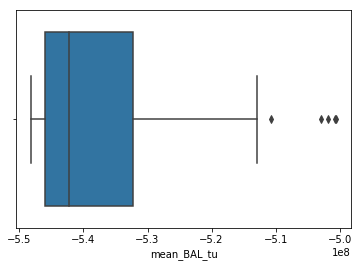

In [227]:
sns.boxplot(x=df0_ts['mean_BAL_tu'])

In [228]:
df0_ts.to_csv ('df0_ts.csv', index = None, header=True)


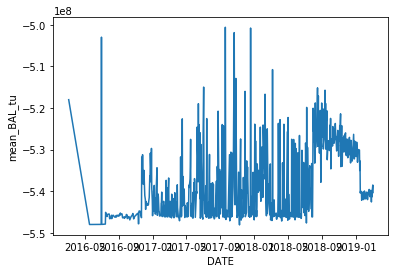

In [232]:
ax = sns.lineplot(x="DATE", y="mean_BAL_tu", data=df0_ts)